<a href="https://colab.research.google.com/github/Bharat0207/Credit-score-classification/blob/main/Credit_Score_Classification_ANN_95_91_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
parisrohan_credit_score_classification_path = kagglehub.dataset_download('parisrohan/credit-score-classification')
iremnurtokuroglu_credit_score_classification_cleaned_dataset_path = kagglehub.dataset_download('iremnurtokuroglu/credit-score-classification-cleaned-dataset')

print('Data source import complete.')


100%|██████████| 9.51M/9.51M [00:00<00:00, 74.5MB/s]

Extracting files...


100%|██████████| 3.97M/3.97M [00:00<00:00, 115MB/s]

Extracting files...
Data source import complete.


<p style="background-color:#009de1;font-family:tahoma;font-size:30pt;color:white;text-align:center;border-radius:10px; padding-bottom:2.5%; height:70px; line-height:70px;"><b>Credit Score Classification - ANN </b></p>

<font color=#ff0000> **Note:** <font>

<font color=#ff0000> This notebook uses a cleaned and thoroughly explored version of the credit-score-classification train dataset. Therefore, no additional exploratory data analysis (EDA) has been conducted here, only an overview of the data structure has been provided. You can access and review my EDA notebook either from this dataset or via my profile.</font>

<div style="color:#009de1">
    
<span style="font-size:22px;font-family:Tahoma;color:#009de1"> About the Dataset </span>
<hr style="height:0.6px;background-color:#009de1">
</div>

<p style="font-family:tahoma;text-align:justify" >

This dataset provides a comprehensive view of customer profiles, encompassing demographic details, financial histories, and payment patterns that play a crucial role in evaluating credit risk. The goal is to clean and analyze this data to identify key features suitable for training Machine Learning and Deep Learning Algorithms.

- **Dataset:** Credit Score Dataset  
- **Content:** Customer demographic, financial, and credit history data.  
- **Number of Rows:** 100 000
- **Number of Columns:** 28  

| **No** | **INPUTS**                  | **Description**                                                                                  |
|-------|-----------------------------|--------------------------------------------------------------------------------------------------|
| 1     | **id**                       | Unique identifier for each record.                                                               |
| 2     | **customer_id**              | Unique identifier for each customer.                                                             |
| 3     | **month**                    | Month of the transaction or record.                                                              |
| 4     | **name**                     | Customer’s name.                                                                                 |
| 5     | **age**                      | The customer’s age.                                                                              |
| 6     | **ssn**                      | Customer’s social security number.                                                               |
| 7     | **occupation**               | The customer’s occupation.                                                                       |
| 8     | **annual_income**            | The customer’s annual income.                                                                    |
| 9     | **monthly_inhand_salary**    | The customer’s monthly take-home salary.                                                         |
| 10    | **num_bank_accounts**        | Total number of bank accounts owned by the customer.                                            |
| 11    | **num_credit_card**          | Total number of credit cards held by the customer.                                              |
| 12    | **interest_rate**            | The interest rate applied to loans or credits.                                                  |
| 13    | **num_of_loan**              | Number of loans the customer has taken.                                                          |
| 14    | **type_of_loan**             | Categories of loans obtained by the customer.                                                   |
| 15    | **delay_from_due_date**      | The delay in payment relative to the due date.                                                 |
| 16    | **num_of_delayed_payment**   | Total instances of late payments made by the customer.                                          |
| 17    | **changed_credit_limit**     | Adjustments made to the customer’s credit limit.                                               |
| 18    | **num_credit_inquiries**     | Number of inquiries made regarding the customer's credit.                                       |
| 19    | **credit_mix**               | The variety of credit types the customer uses (e.g., loans, credit cards).                     |
| 20    | **outstanding_debt**         | Total amount of debt the customer currently owes.                                              |
| 21    | **credit_utilization_ratio** | Proportion of credit used compared to the total credit limit.                                   |
| 22    | **credit_history_age**       | Duration of the customer’s credit history.                                                      |
| 23    | **payment_of_min_amount**    | Indicates if the customer pays the minimum required amount each month.                         |
| 24    | **total_emi_per_month**      | Total Equated Monthly Installment (EMI) paid by the customer.                                   |
| 25    | **amount_invested_monthly**  | Monthly investment amount made by the customer.                                                 |
| 26    | **payment_behaviour**        | Customer’s payment habits and tendencies.                                                       |
| 27    | **monthly_balance**          | The remaining balance in the customer’s account at the end of each month.                      |
| 28    | **credit_score**             | The customer’s credit score (target variable: "Good," "Poor," "Standard").                     |

- > *This dataset is an excellent foundation for building models aimed at evaluating credit risk, enabling a thorough exploration of the elements influencing credit scores.*  
- > *This notebook uses the dataset, which is the cleaned dataset I performed EDA on. Original dataset is available on Kaggle:* [Credit Score Classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv)

---
<p>


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import pickle
import re
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss


# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# To disable warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')
tf.config.optimizer.set_jit(False)

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# Pandas Settings
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 200)

# Read the Dataset and Overview

In [4]:
# For Google Colab - Upload CSV from your local system
from google.colab import files
import pandas as pd

# Step 1: Upload file
uploaded = files.upload()

# Step 2: Get filename from uploaded files
filename = list(uploaded.keys())[0]

# Step 3: Read the CSV into a DataFrame
df = pd.read_csv(filename)

Saving credit_score_cleaned_train.csv to credit_score_cleaned_train.csv


In [5]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,89,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.270,4,Good,809.980,26.823,No,80.415,High_spent_Small_value_payments,312.494,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,93,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1,7,11.270,4,Good,809.980,31.945,No,118.280,Low_spent_Large_value_payments,284.629,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,91,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.270,4,Good,809.980,28.609,No,81.700,Low_spent_Medium_value_payments,331.210,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,92,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",5,4,6.270,4,Good,809.980,31.378,No,199.458,Low_spent_Small_value_payments,223.451,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,93,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",6,4,11.270,4,Good,809.980,24.797,No,41.420,High_spent_Medium_value_payments,341.489,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  object 
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  int64  
 5   ssn                       96696 non-null  object 
 6   occupation                96696 non-null  object 
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  int64  
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  int64  
 12  num_credit_card           96696 non-null  int64  
 13  interest_rate             96696 non-null  int64  
 14  num_of

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96696.000,33.942,10.378,16.000,25.000,34.000,42.000,56.000
annual_income,96696.000,50898.597,38543.774,7006.035,19480.040,37367.340,72245.760,179987.280
monthly_inhand_salary,96696.000,4231.402,3207.836,303.645,1634.721,3116.121,6016.623,15204.634
credit_history_age,96696.000,78.472,33.292,-1.000,53.000,78.000,106.000,147.000
total_emi_per_month,96696.000,106.503,130.404,0.000,28.637,65.712,145.757,3776.000
num_bank_accounts,96696.000,5.319,2.598,0.000,3.000,5.000,7.000,11.000
num_credit_card,96696.000,5.498,2.057,0.000,4.000,5.000,7.000,11.000
interest_rate,96696.000,14.348,8.709,1.000,7.000,13.000,20.000,34.000
num_of_loan,96696.000,3.481,2.435,0.000,2.000,3.000,5.000,9.000
delay_from_due_date,96696.000,20.807,14.785,-5.000,10.000,18.000,28.000,67.000


In [8]:
df.describe(include="object").T

,count,unique,top,freq
id,96696,96696,0x25fed,1
customer_id,96696,12087,CUS_0x942c,8
month,96696,8,January,12087
name,96696,9859,Langep,48
ssn,96696,12087,078-73-5990,8
occupation,96696,15,Lawyer,6888
type_of_loan,96696,5981,['No Loan'],11312
credit_mix,96696,3,Standard,44048
payment_of_min_amount,96696,2,Yes,56128
payment_behaviour,96696,6,Low_spent_Small_value_payments,26503


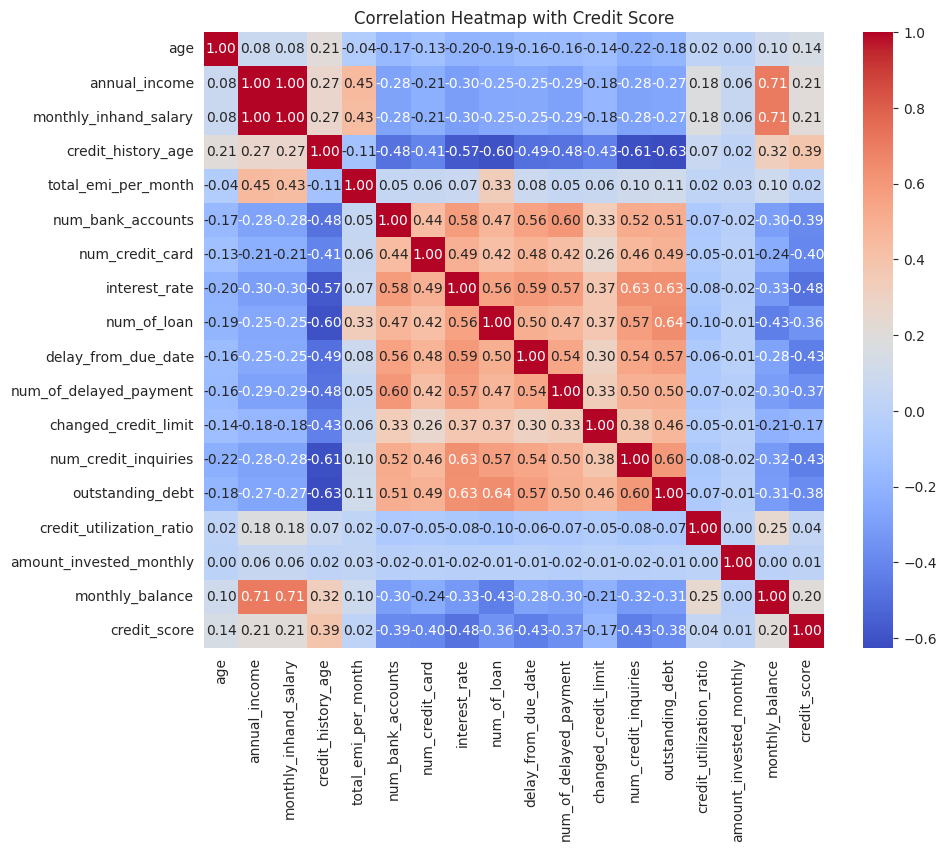

In [9]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [10]:
# Numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

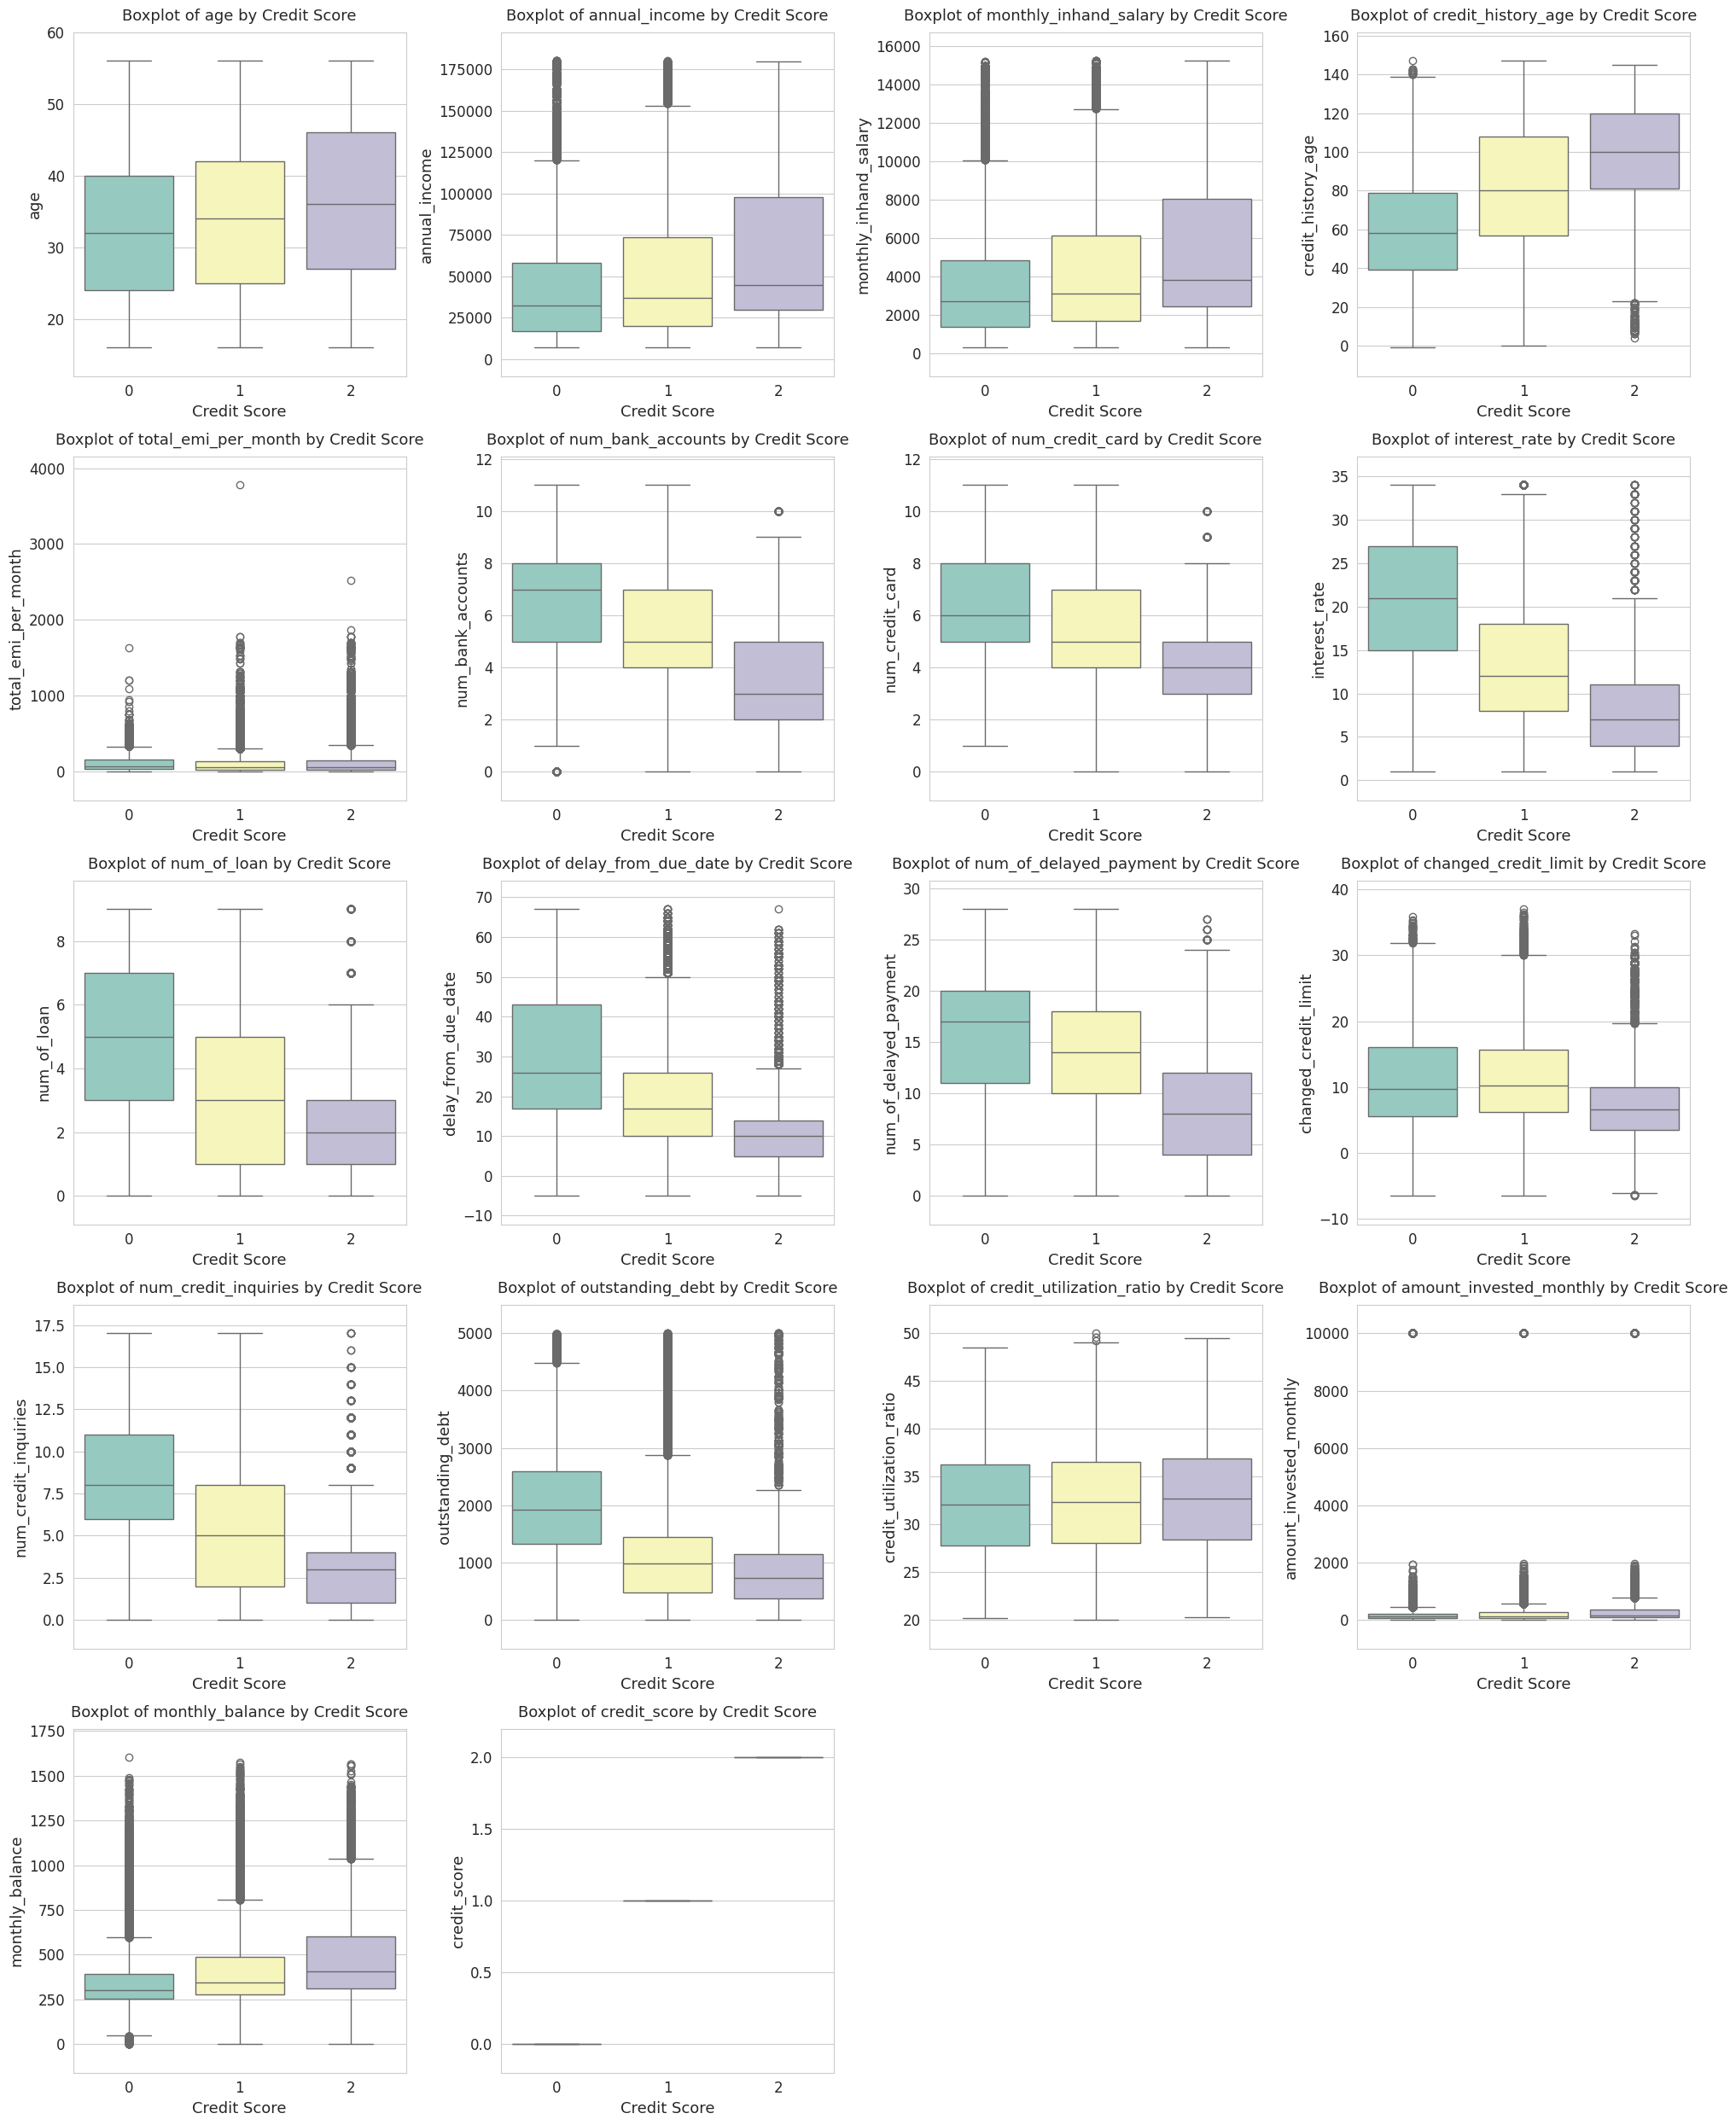

In [11]:

# Calculate number of rows and columns
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

# Plotting
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Automatically adjust y-axis limits
    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

# Adjust horizontal (wspace) and vertical (hspace) spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()
plt.show()

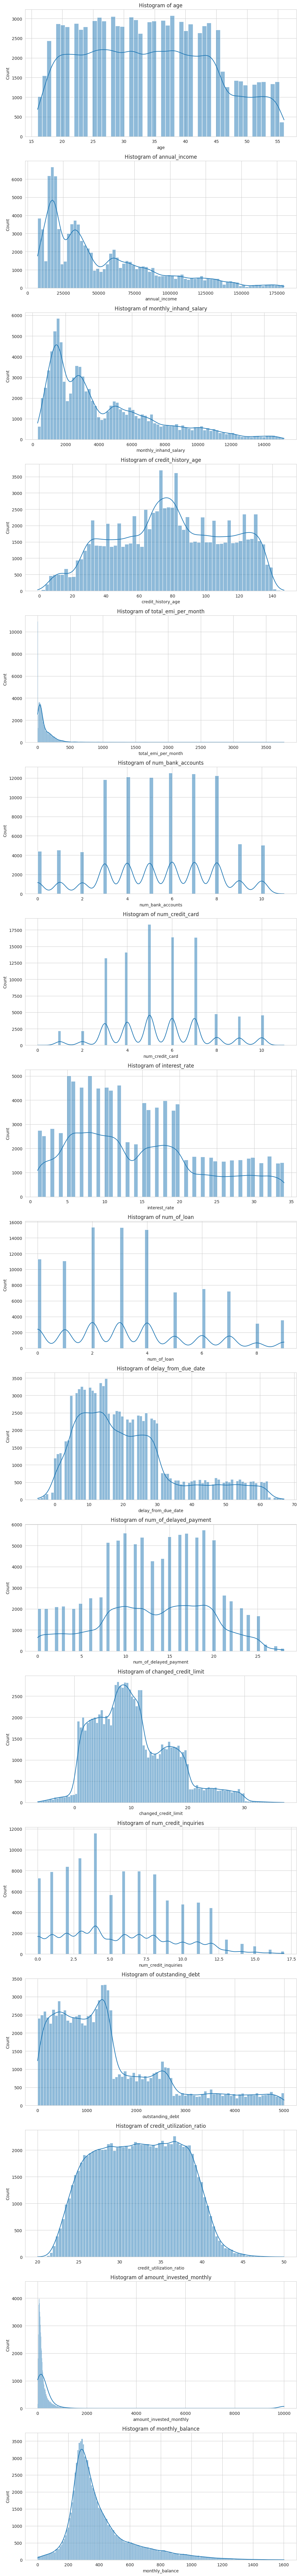

In [12]:
# Get all numerical features
features = numeric_columns[:-1]

# Define the layout for the plots
n_cols = 1  # Specify the number of columns here
n_rows = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
plt.subplots_adjust(hspace=0.5)

# Plotting
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])  # hue parametresi kaldırıldı
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [13]:
# Function to detect outliers
def detect_outliers_iqr(df):
    outliers = {}

    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    for column in numeric_df.columns:
        # Calculate the first (Q1) and third quartiles (Q3)
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Determine the lower and upper bounds
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify outliers
        outlier_mask = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
        outliers[column] = numeric_df[column][outlier_mask]

    return outliers

# Detect outliers
outlier_results = detect_outliers_iqr(df)

# Print the results
for column, outlier_values in outlier_results.items():
    if not outlier_values.empty:
        print(f"{column} outliers:")
        print(outlier_values)
    else:
        print(f"For {column} no outliers.")


For age no outliers.
For annual_income no outliers.
For monthly_inhand_salary no outliers.
For credit_history_age no outliers.
total_emi_per_month outliers:
50      911.220
51      911.220
52      911.220
53      911.220
54      911.220
          ...  
96323   999.719
96324   999.719
96325   999.719
96326   999.719
96327   999.719
Name: total_emi_per_month, Length: 1299, dtype: float64
For num_bank_accounts no outliers.
For num_credit_card no outliers.
For interest_rate no outliers.
For num_of_loan no outliers.
For delay_from_due_date no outliers.
For num_of_delayed_payment no outliers.
For changed_credit_limit no outliers.
For num_credit_inquiries no outliers.
For outstanding_debt no outliers.
For credit_utilization_ratio no outliers.
amount_invested_monthly outliers:
18      10000.000
23      10000.000
28      10000.000
54        930.392
55        870.522
           ...   
96615   10000.000
96623    1104.416
96647   10000.000
96669   10000.000
96670   10000.000
Name: amount_invested_

In [14]:
df["credit_score"].value_counts(normalize = True) # 2:Good, 1: Standard, 0: Poor

,proportion
credit_score,
1,0.533
0,0.284
2,0.183


# Data Preprocessing


In [15]:
# List of unique loan values
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

# Adding a new column for each unique loan type and checking how many times it appears
for loan_type in unique_loan_types:
    # Replacing '-' and spaces with underscores, converting other characters to lowercase
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    # Counting how many times the loan_type value appears in each row
    df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))

In [16]:
df = df.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.120,1824.843,89,49.575,3,4,3,4,3,7,11.270,4,Good,809.980,26.823,No,80.415,High_spent_Small_value_payments,312.494,2,1,1,0,1,0,0,0,0,1,0
1,February,23,Scientist,19114.120,1824.843,93,49.575,3,4,3,4,-1,7,11.270,4,Good,809.980,31.945,No,118.280,Low_spent_Large_value_payments,284.629,2,1,1,0,1,0,0,0,0,1,0
2,March,23,Scientist,19114.120,1824.843,91,49.575,3,4,3,4,3,7,11.270,4,Good,809.980,28.609,No,81.700,Low_spent_Medium_value_payments,331.210,2,1,1,0,1,0,0,0,0,1,0
3,April,23,Scientist,19114.120,1824.843,92,49.575,3,4,3,4,5,4,6.270,4,Good,809.980,31.378,No,199.458,Low_spent_Small_value_payments,223.451,2,1,1,0,1,0,0,0,0,1,0
4,May,23,Scientist,19114.120,1824.843,93,49.575,3,4,3,4,6,4,11.270,4,Good,809.980,24.797,No,41.420,High_spent_Medium_value_payments,341.489,2,1,1,0,1,0,0,0,0,1,0


In [17]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,#Successfully managing large debts provides the most positive contribution to the credit score.
    'High_spent_Medium_value_payments': 5, #Medium-value payments with high spending positively impact the credit score.
    'High_spent_Small_value_payments': 4, #Small payments can negatively affect the credit score if debts accumulate over time.
    'Low_spent_Large_value_payments': 3, #shows quick financial responsibility, positively affecting the credit score.
    'Low_spent_Medium_value_payments': 2, #contributes positively to the credit score by demonstrating debt management.
    'Low_spent_Small_value_payments': 1 #may limit the credit history and provide minimal contribution to the credit score
}


df['payment_behaviour'] = df['payment_behaviour'].map(payment_mapping)

df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'], downcast='integer')


In [18]:
# Convert the credit_mix column to numerical values
df['credit_mix'] = df['credit_mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

df['credit_mix'] = pd.to_numeric(df['credit_mix'], downcast='integer')

In [19]:
# Convert the payment_of_min_amount column to numerical values
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes': 1, 'No': 0})

df['payment_of_min_amount'] = pd.to_numeric(df['payment_of_min_amount'], downcast='integer')



In [20]:
df = pd.get_dummies(df, columns=['occupation'])

In [21]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

#Mapping
df['month'] = df['month'].map(month_map)

df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [22]:
# Separate features and target variable
X = df.drop("credit_score", axis=1)
y = df.credit_score

In [23]:
y.value_counts(normalize=True) # unbalanced data  2:Good, 1: Standard, 0: Poor

,proportion
credit_score,
1,0.533
0,0.284
2,0.183


In [24]:
# smote for unbalanced data
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [25]:
y.value_counts() # 2:Good, 1: Standard, 0: Poor

,count
credit_score,
2,51503
1,51503
0,51503


In [26]:
df.head()

,month,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan,occupation_Accountant,occupation_Architect,occupation_Developer,occupation_Doctor,occupation_Engineer,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,1,23,19114.120,1824.843,89,49.575,3,4,3,4,3,7,11.270,4,2,809.980,26.823,0,80.415,4,312.494,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2,23,19114.120,1824.843,93,49.575,3,4,3,4,-1,7,11.270,4,2,809.980,31.945,0,118.280,3,284.629,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3,23,19114.120,1824.843,91,49.575,3,4,3,4,3,7,11.270,4,2,809.980,28.609,0,81.700,2,331.210,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,4,23,19114.120,1824.843,92,49.575,3,4,3,4,5,4,6.270,4,2,809.980,31.378,0,199.458,1,223.451,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,5,23,19114.120,1824.843,93,49.575,3,4,3,4,6,4,11.270,4,2,809.980,24.797,0,41.420,5,341.489,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## Train-Test Splits

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    stratify=y, random_state=42)

In [28]:
df["credit_score"].value_counts()

,count
credit_score,
1,51503
0,27485
2,17708


In [29]:
y_train.value_counts()

,count
credit_score,
0,46353
1,46353
2,46352


In [30]:
# Columns to apply RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

# Apply to training data
X_train_scaled= scaler.fit_transform(X_train)

# Apply to test data
X_test_scaled = scaler.transform(X_test)


In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# ANN Modele

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Setting seed for reproducibility
tf.random.set_seed(42)

# Building the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compiling the model with Adam optimizer and learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Adding callbacks: EarlyStopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5, verbose=1)

# Training the model
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=128,
    epochs=1000,
    verbose=1,
    callbacks=[early_stopping]  # Make sure there are no hidden characters here
)

Epoch 1/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6790 - loss: 0.8027 - val_accuracy: 0.7480 - val_loss: 0.6035
Epoch 2/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7471 - loss: 0.6066 - val_accuracy: 0.7623 - val_loss: 0.5668
Epoch 3/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7602 - loss: 0.5742 - val_accuracy: 0.7756 - val_loss: 0.5401
Epoch 4/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7707 - loss: 0.5466 - val_accuracy: 0.7843 - val_loss: 0.5111
Epoch 5/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7835 - loss: 0.5175 - val_accuracy: 0.7949 - val_loss: 0.4895
Epoch 6/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7973 - loss: 0.4886 - val_accuracy: 0.8104 - val_loss: 0.4573
Epoch 7/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8080 - loss: 0.4656 - val_accuracy: 0.8283 - val_loss: 0.4303
Epoch 8/1000
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8202

Since the best result is seen at epoch 412 above, I will train the final model for 318 epochs without using early stopping.

<Axes: >

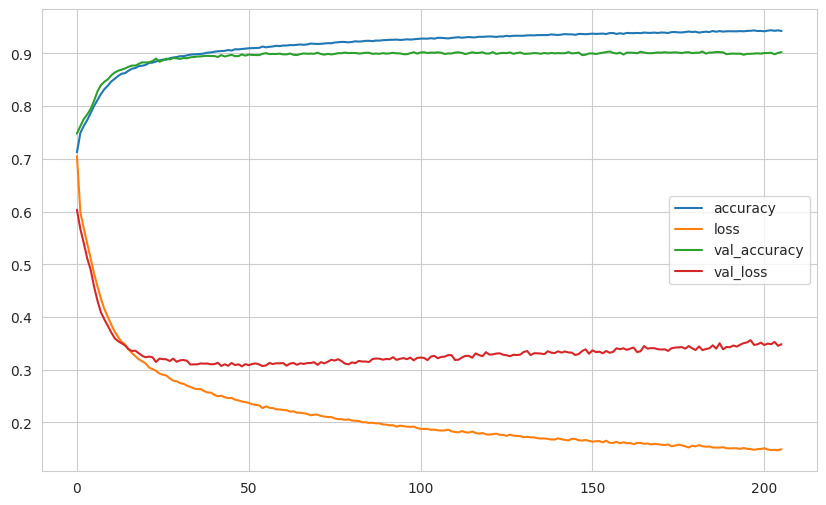

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [34]:
model.evaluate(X_train_scaled, y_train)

4346/4346 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9620 - loss: 0.0989


[0.09763963520526886, 0.9627565741539001]

In [35]:
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

4346/4346 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[4819  276   55]
 [ 556 4184  410]
 [  20  171 4960]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5150
           1       0.90      0.81      0.86      5150
           2       0.91      0.96      0.94      5151

    accuracy                           0.90     15451
   macro avg       0.90      0.90      0.90     15451
weighted avg       0.90      0.90      0.90     15451


Train Set:
[[45805   533    15]
 [ 2629 42004  1720]
 [   16   266 46070]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46353
           1       0.98      0.91      0.94     46353
           2       0.96      0.99      0.98     46352

    accuracy                           0.96    139058
   macro avg       0.96      0.96      0.96    139058
weighted avg       0.96      0.96      0.96    139058



In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,365,259 (5.21 MB)

 Trainable params: 454,147 (1.73 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 908,296 (3.46 MB)

# Final Model

In [37]:
print(X.shape)
print(y.shape)

(154509, 46)
(154509,)


In [38]:
# Columns to apply RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']
# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler= ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)
    ]
)

scaler = scaler.fit(X)



In [39]:
pickle.dump(scaler, open("credit_score_scaler", 'wb'))

In [40]:
X_scaled = scaler.transform(X)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

tf.random.set_seed(42)

# Define the model architecture with additional layers and tuned dropout rates
final_model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

# Compile model with a learning rate scheduler
final_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=50,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=15,
    min_lr=1e-6
)

# Train model with callbacks
history = final_model.fit(
    X_scaled,
    y,
    batch_size=128,  # Experiment with batch size
    epochs=1000,  # Increased epochs for better convergence
    validation_split=0.2,  # Add validation for early stopping
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.5921 - loss: 0.9475 - val_accuracy: 0.7242 - val_loss: 0.8824 - learning_rate: 0.0010
Epoch 2/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6902 - loss: 0.6864 - val_accuracy: 0.7221 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 3/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7073 - loss: 0.6512 - val_accuracy: 0.7276 - val_loss: 0.8124 - learning_rate: 0.0010
Epoch 4/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7160 - loss: 0.6328 - val_accuracy: 0.6575 - val_loss: 0.8840 - learning_rate: 0.0010
Epoch 5/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7218 - loss: 0.6194 - val_accuracy: 0.7137 - val_loss: 0.8303 - learning_rate: 0.0010
Epoch 6/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7273 - loss: 0.6088 - val_accuracy: 0.7037 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 7/1000
966/966 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7313 

In [42]:
# Save Model

save_model(final_model, 'final_model_credit_score.keras')

# Final Model Prediction

In [43]:
scaler = pickle.load(open("credit_score_scaler", "rb"))

In [44]:
final_model = load_model('final_model_credit_score.keras')

<font color=#ff0000> **Note:** <font>

<font color=#ff0000>
  "Since We don’t know the true values of the target column in the credit_score_test data, the prediction step would be a mere formality. For this reason, instead of performing EDA on the credit_score_test data,
  I’m generating synthetic data based on the statistics of my own cleaned dataset." </font>

In [45]:
# Generating random data suitable for statistics using your sample dataset
def generate_synthetic_data(df, num_samples=50):
    synthetic_data = pd.DataFrame()

    for column in df.columns:
        if column != 'credit_score':  # Excluding the target column (e.g., for classification)
            # Extract statistics from your current dataset
            min_val = df[column].min()
            max_val = df[column].max()
            mean_val = df[column].mean()
            std_val = df[column].std()

            # Generate random data suitable for statistics
            synthetic_data[column] = np.random.normal(loc=mean_val, scale=std_val, size=num_samples)

            # Adjust the minimum and maximum values of the generated data to match the original dataset
            synthetic_data[column] = synthetic_data[column].clip(lower=min_val, upper=max_val)

    return synthetic_data

# Generating 50 rows of synthetic data based on the statistics of your current dataset
df_prediction = generate_synthetic_data(df, num_samples=50)


In [46]:
df_prediction_scaled = scaler.transform(df_prediction)

In [47]:
final_model.predict(df_prediction_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 478ms/step


array([[9.90967095e-01, 9.03051533e-03, 2.36789538e-06],
       [8.81451964e-01, 1.10588394e-01, 7.95967877e-03],
       [8.94797564e-01, 9.93868220e-04, 1.04208656e-01],
       [1.01574347e-04, 9.99724209e-01, 1.74228495e-04],
       [9.48438466e-01, 4.01861295e-02, 1.13754775e-02],
       [8.82480323e-01, 1.86046641e-02, 9.89149958e-02],
       [5.41053945e-03, 9.43858743e-01, 5.07306792e-02],
       [9.99695420e-01, 4.21325749e-05, 2.62365793e-04],
       [2.93423757e-02, 9.69322145e-01, 1.33546500e-03],
       [9.29225445e-01, 4.43124138e-02, 2.64621079e-02],
       [9.99351323e-01, 6.06343790e-04, 4.22445082e-05],
       [6.07485533e-01, 3.91974658e-01, 5.39788627e-04],
       [7.88261648e-04, 1.69367954e-01, 8.29843819e-01],
       [5.22393845e-02, 9.46167648e-01, 1.59290736e-03],
       [9.58382189e-01, 3.90704907e-02, 2.54734536e-03],
       [1.61780715e-01, 8.38193536e-01, 2.57403262e-05],
       [9.64314342e-01, 3.49649265e-02, 7.20806420e-04],
       [5.86570401e-15, 9.99999

In [48]:
y_pred_probabilities = final_model.predict(df_prediction_scaled)

y_pred = y_pred_probabilities.argmax(axis=1) #prediction values



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [49]:
normalized_predictions = tf.nn.softmax(y_pred_probabilities, axis=-1).numpy()#normalized probabilites of each class

In [50]:
pred_df = pd.DataFrame({'pred': y_pred})

# Mapping dictionary for the reverse transformation
mapping = {2: 'Good', 1: 'Standard', 0: 'Poor'}

# Apply the mapping
pred_df["pred"] = pred_df["pred"] .map(mapping)



In [51]:
pred_df["pred_proba_poor"] = normalized_predictions[:,0]
pred_df["pred_proba_standard"] = normalized_predictions[:,1]
pred_df["pred_proba_good"] = normalized_predictions[:,2]
pred_df

,pred,pred_proba_poor,pred_proba_standard,pred_proba_good
0,Poor,0.573,0.215,0.213
1,Poor,0.532,0.246,0.222
2,Poor,0.537,0.220,0.244
3,Standard,0.212,0.576,0.212
4,Poor,0.557,0.225,0.218
5,Poor,0.532,0.224,0.243
6,Standard,0.217,0.555,0.227
7,Poor,0.576,0.212,0.212
8,Standard,0.221,0.565,0.215
9,Poor,0.550,0.227,0.223
